In [115]:
# 卸売業者のクラスタリング
# データ・セット: https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv

# ライブラリ・インポート
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans

In [116]:
# データセット
DATA = './data/Wholesales_customers_data.csv'

In [117]:
# wholesles_data = np.genfromtxt(DATA, delimiter=',', skip_header=1)
df = pd.read_csv(DATA)

In [118]:
# wholesles_data

In [119]:
# wholesles_data[:5]

In [120]:
# wholesles_data.shape

In [121]:
# 正規化
# wholesles_data_norm = wholesles_data / np.linalg.norm(wholesles_data)

In [122]:
# print(wholesles_data_norm[:5])

In [123]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


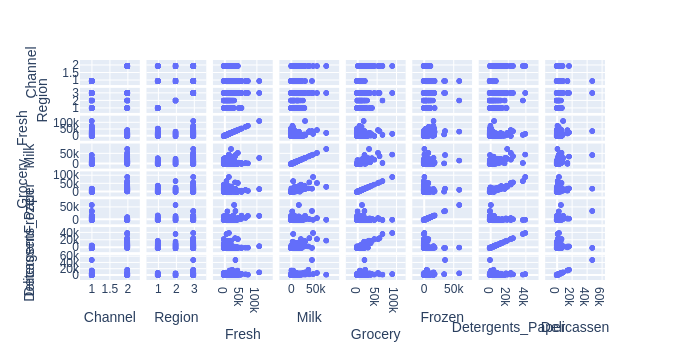

In [124]:
# 散布行列図
px.scatter_matrix(data_frame=df)

In [125]:
# 相関関係
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


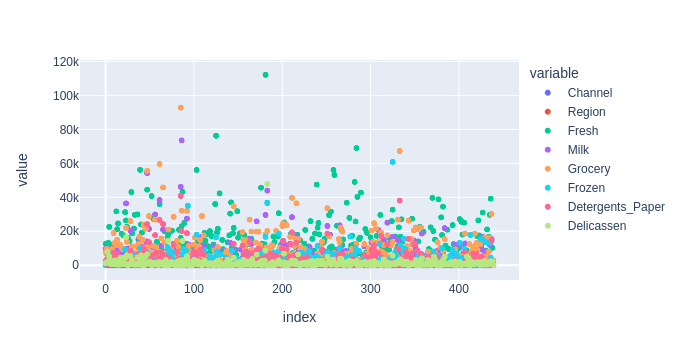

In [126]:
px.scatter(data_frame=df)

In [127]:
df_selected = df.drop(columns={'Channel', 'Region'})

In [128]:
df_selected

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [129]:
# 目的変数、説明変数
y = df['Channel']
X = df[['Grocery', 'Region']]

In [130]:
X

,Grocery,Region
0,7561,3
1,9568,3
2,7684,3
3,4221,3
4,7198,3
...,...,...
435,16027,3
436,764,3
437,30243,3
438,2232,3


In [131]:
km = KMeans(n_clusters=3)

In [132]:
pred = km.fit_predict(X)

In [135]:
centers = km.cluster_centers_

In [136]:
labels = km.labels_

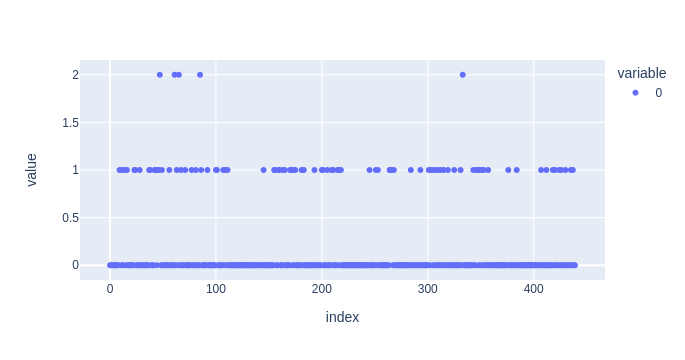

In [137]:
px.scatter(labels)

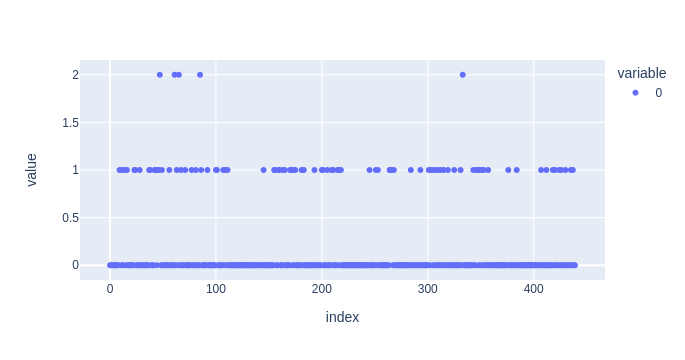

In [138]:
px.scatter(pred)

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Count'>

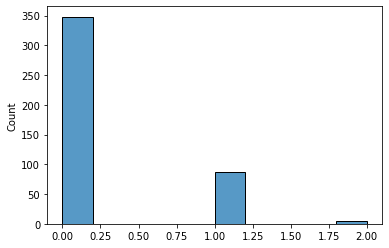

In [140]:
sns.histplot(pred)

<AxesSubplot:ylabel='Count'>

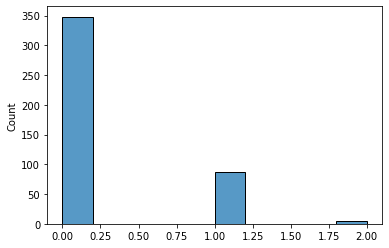

In [141]:
sns.histplot(labels)

In [142]:
from sklearn.cluster import KMeans
model_km = KMeans(n_clusters=3)
model_km.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [143]:
y_hat = model_km.predict(X)

In [144]:
model_km.labels_
df['cluster'] = model_km.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


<AxesSubplot:xlabel='Grocery', ylabel='cluster'>

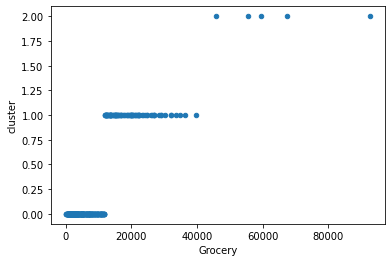

In [145]:
df.plot.scatter(x='Grocery', y='cluster')

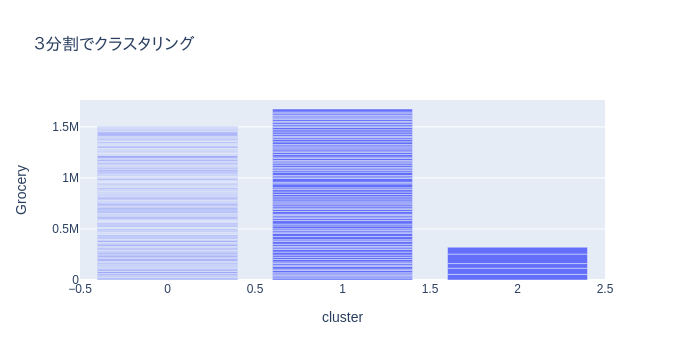

In [146]:
px.bar(data_frame=df, x="cluster", y="Grocery", title="３分割でクラスタリング")

In [147]:
df.query('cluster == 2')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
47,2,3,44466,54259,55571,7782,24171,6465,2
61,2,3,35942,38369,59598,3254,26701,2017,2
65,2,3,85,20959,45828,36,24231,1423,2
85,2,3,16117,46197,92780,1026,40827,2944,2
333,2,2,8565,4980,67298,131,38102,1215,2


In [148]:
df.query('cluster == 1')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
9,2,3,6006,11093,18881,1159,7425,2098,1
10,2,3,3366,5403,12974,4400,5977,1744,1
13,2,3,21217,6208,14982,3095,6707,602,1
14,2,3,24653,9465,12091,294,5058,2168,1
16,2,3,1020,8816,12121,134,4508,1080,1
...,...,...,...,...,...,...,...,...,...
424,2,3,16980,2884,12232,874,3213,249,1
426,1,3,13134,9347,14316,3141,5079,1894,1
430,1,3,3097,4230,16483,575,241,2080,1
435,1,3,29703,12051,16027,13135,182,2204,1


In [149]:
df.query('cluster == 0')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
433,1,3,1982,3218,1493,1541,356,1449,0
434,1,3,16731,3922,7994,688,2371,838,0
436,1,3,39228,1431,764,4510,93,2346,0
438,1,3,10290,1981,2232,1038,168,2125,0


In [150]:
# Grocerryの売上によって３分割されたと言える
df_2 = df.query('cluster == 2')
df_1 = df.query('cluster == 1')
df_0 = df.query('cluster == 0')

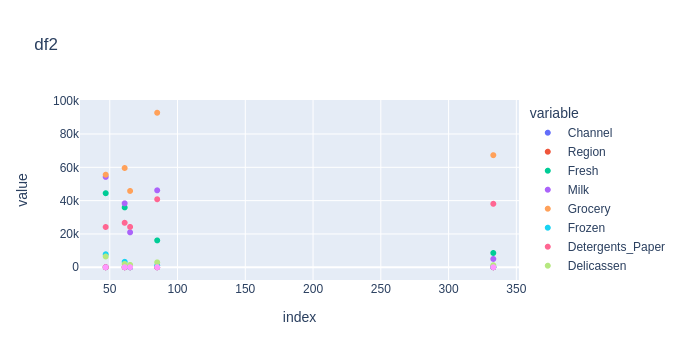

In [152]:
# plot
px.scatter(data_frame=df_2, title="df2")

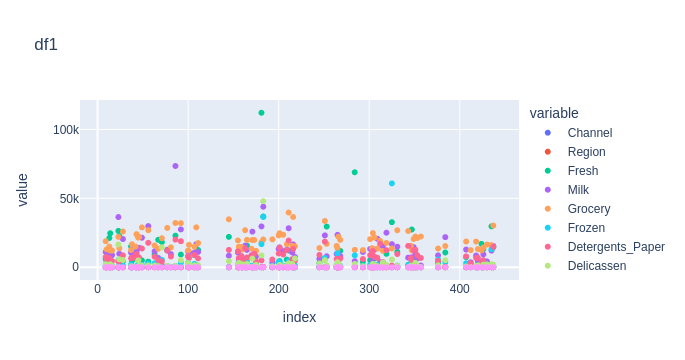

In [153]:
# px.scatter(data_frame=df_1, title="df1")
px.scatter(data_frame=df_1, title="df1")

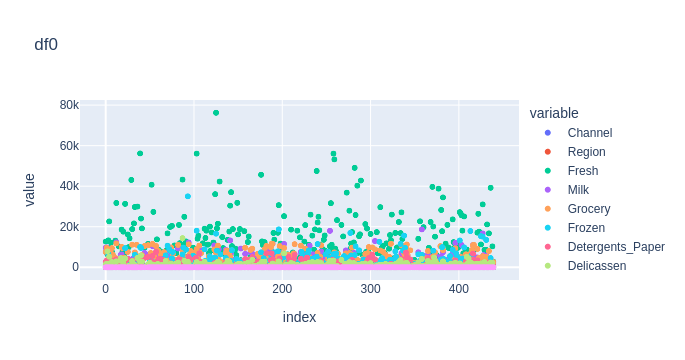

In [154]:
px.scatter(data_frame=df_0, title="df0")

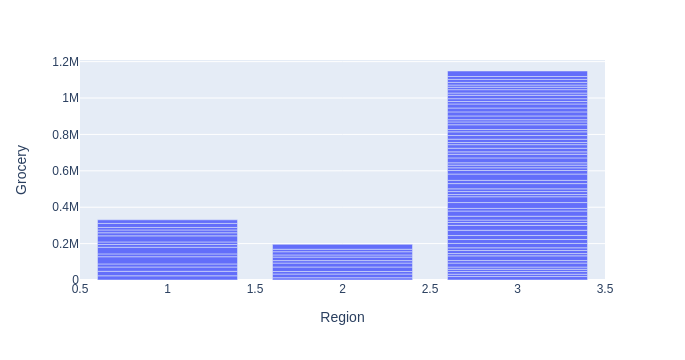

In [155]:
# plot
px.bar(data_frame=df_1 ,x='Region', y='Grocery')

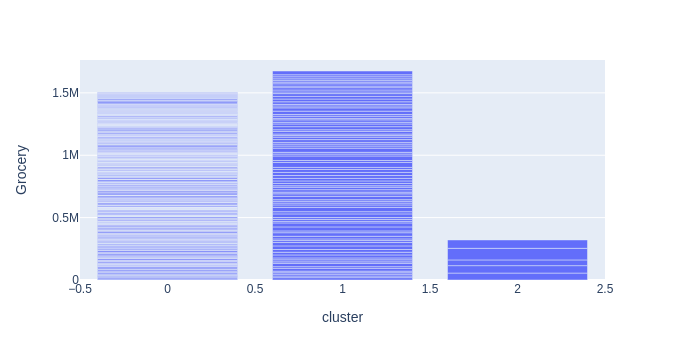

In [156]:
px.bar(data_frame=df, x="cluster", y="Grocery")

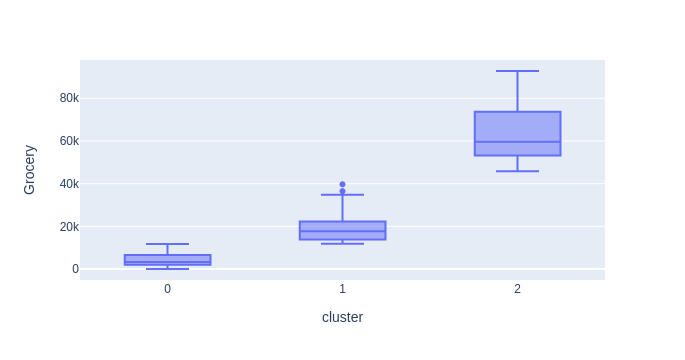

In [174]:
px.box(data_frame=df, x="cluster", y="Grocery")

In [185]:
model_km.precompute_distances

'deprecated'

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
x = tsne.fit_transform(X)

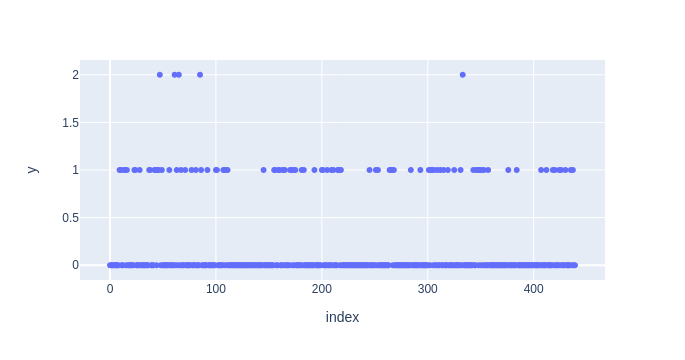

In [29]:
# plt.scatter(x, y_hat)
px.scatter(x, y=y_hat)

In [30]:
from scipy.cluster.vq import vq
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import whiten

In [31]:
whitened = whiten(x)

In [32]:
x[2]

array([-418.38843 ,   37.568752], dtype=float32)

In [33]:
book = np.array((whitened[0],whitened[2]))

In [34]:
kmeans(whitened,book)

(array([[-0.33423322,  0.91120356],
        [ 0.2283045 , -0.6240879 ]], dtype=float32),
 0.89699614)

In [35]:
codes = 3

In [36]:
kmeans(whitened,codes)

(array([[-0.3490862 ,  0.83574647],
        [-0.36749116, -0.9494015 ],
        [ 1.5586128 , -0.01047586]], dtype=float32),
 0.6946077)

In [37]:
pts = 50

In [38]:
rng = np.random.default_rng()

In [39]:
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)

In [40]:
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)

In [41]:
features = np.concatenate((a, b))

In [42]:
whitened = whiten(features)

In [43]:
codebook, distortion = kmeans(whitened, 2)

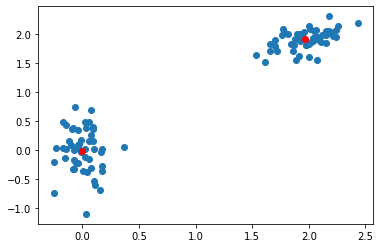

In [44]:
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')

In [45]:
features

array([[ 1.11778074e+00, -1.64692629e+00],
       [-1.77636654e+00,  7.96331953e-01],
       [ 1.10564296e+00,  1.36568952e+00],
       [ 1.67671149e+00, -3.13531774e+00],
       [ 2.68183108e+00,  1.27237708e-01],
       [ 3.08232045e-01,  1.03957349e-01],
       [ 1.44959341e-01, -1.92200360e+00],
       [-1.14954947e+00, -1.69508930e+00],
       [-1.16598958e+00, -8.85303731e-01],
       [ 3.50261181e-01,  2.53886136e+00],
       [ 4.69906153e-01,  1.98686075e+00],
       [ 1.52446514e+00, -2.81878528e+00],
       [-1.25706156e+00, -1.69140395e+00],
       [-9.43349184e-01,  3.86960033e+00],
       [-6.46823585e-01, -1.15594693e+00],
       [-4.13742393e-01,  5.12189689e-01],
       [-5.98010880e-01,  4.36808434e-01],
       [-1.42815041e+00,  1.93352314e+00],
       [ 1.39179428e+00,  1.90119388e+00],
       [-2.58843366e+00,  2.51093853e+00],
       [ 5.85991187e-01, -1.97754415e+00],
       [-2.26473785e+00,  2.24443051e+00],
       [ 9.05178992e-01,  2.50833868e+00],
       [-1.

<AxesSubplot:ylabel='Count'>

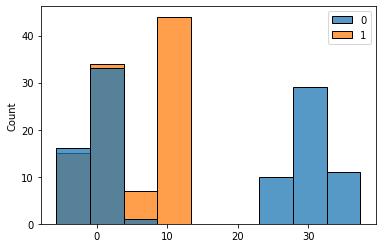

In [46]:
sns.histplot(features)

In [47]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

Automatically created module for IPython interactive environment


In [48]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
rng = np.random.RandomState(seed=42)
X['random_cat'] = rng.randint(3, size=X.shape[0])
X['random_num'] = rng.randn(X.shape[0])

categorical_columns = ['pclass', 'sex', 'embarked', 'random_cat']
numerical_columns = ['age', 'sibsp', 'parch', 'fare', 'random_num']

X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

categorical_encoder = OneHotEncoder(handle_unknown='ignore')
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare', 'random_num'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [49]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.817


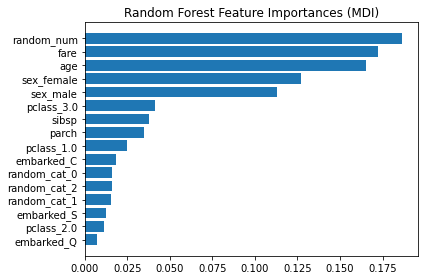

In [50]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

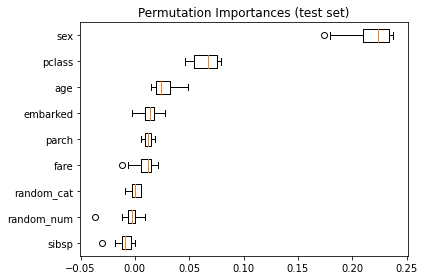

In [51]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]
                    feature  importance
0               mean radius    0.000000
1              mean texture    0.000000
2            mean perimeter    0.000000
3                 mean area    0.000000
4           mean smoothness    0.000000
5          mean compactness    0.000000
6            mean concavity    0.000000
7       mean concave points    0.000000
8             mean symmetry    0.000000
9    mean fractal dimension    0.000000
10             radius error    0.010197
11            texture error    0.048398
12          perimeter error    0.000000
13               area error    0.000000
14         smoothness error    0.002416
15        compactness error    0.000000
16      

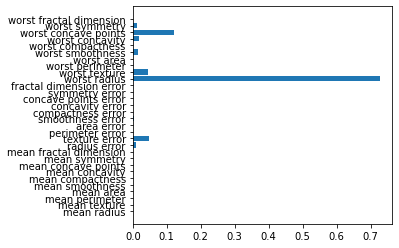

In [52]:
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
 
ds = load_breast_cancer()
X_train, X_test, y_train, y_test =\
    train_test_split(ds.data, ds.target, stratify=ds.target, random_state=42)
 
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
 
print(clf.feature_importances_)
 
df = DataFrame(
    {'feature':ds.feature_names, 'importance':clf.feature_importances_})
print(df)
 
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.3)
ax.barh(df.feature, df.importance)
plt.show()

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
 
# ds = load_breast_cancer()
# データセット
DATA_DIR = './data/'
DATA = 'Wholesales_customers_data.csv'
df = pd.read_csv(DATA_DIR + DATA)

# X_train, X_test, y_train, y_test =\
#    train_test_split(ds.data, ds.target, stratify=ds.target, random_state=42)
 
# clf = DecisionTreeClassifier(max_depth=4, random_state=0)
# clf.fit(X_train, y_train)
 
# print(clf.feature_importances_)
 
# df = DataFrame(
#    {'feature':ds.feature_names, 'importance':clf.feature_importances_})
# print(df)
 
# fig, ax = plt.subplots()
# fig.subplots_adjust(left=0.3)
# ax.barh(df.feature, df.importance)
# plt.show()

In [54]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [55]:
y = df['Channel']
X = df.drop(columns={'Channel'})

In [56]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, random_state=42)
 
# clf = DecisionTreeClassifier(max_depth=4, random_state=0)
# clf.fit(X_train, y_train)
 
# print(clf.feature_importances_)
 
# df = DataFrame(
#    {'feature':ds.feature_names, 'importance':clf.feature_importances_})
# print(df)
 
# fig, ax = plt.subplots()
# fig.subplots_adjust(left=0.3)
# ax.barh(df.feature, df.importance)
# plt.show()

In [57]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [58]:
print(clf.feature_importances_)

[0.         0.         0.05011731 0.03907653 0.04475937 0.84194775
 0.02409904]


(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.08419478, 0.16838955, 0.25258433, 0.3367791 ,
        0.42097388, 0.50516865, 0.58936343, 0.6735582 , 0.75775298,
        0.84194775]),
 <BarContainer object of 10 artists>)

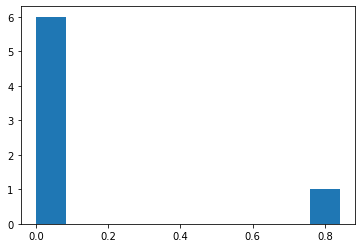

In [59]:
plt.hist(clf.feature_importances_)

In [60]:
X_train

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
314,2,10617,1795,7647,1483,857,1233
3,3,13265,1196,4221,6404,507,1788
18,3,18601,6327,10099,2205,2767,3181
393,3,23632,6730,3842,8620,385,819
60,3,8590,3045,7854,96,4095,225
...,...,...,...,...,...,...,...
106,3,1454,6337,10704,133,6830,1831
270,1,4720,1032,975,5500,197,56
348,3,3428,2380,2028,1341,1184,665
435,3,29703,12051,16027,13135,182,2204
